# 영화 리뷰를 사용한 텍스트 분류

<br>

- 영화 리뷰 텍스트를 긍정(positive) or 부정(negative)로 분류. 이진 분류 문제.
- Internet Movie Database에서 수집한 50,000개의 영화 리뷰 텍스트를 담은 IMBD 데이터셋 사용.
    - 25,000개는 훈련용, 25,000개는 테스트 용.
    - 긍정리뷰와 부정리뷰의 개수가 동일.
- 하고자 하는 것? 해당 리뷰가 긍정인지, 부정인지 판별.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

## IMDB 데이터셋 다운로드

<br>

- 단어의 시퀀스(리뷰)는 미리 전처리 되어있음. 정수 시퀀스로 변환되어 있는 상태.
- 각 정수는 어휘 사전에 있는 특정 단어를 의미.
- **num_words**는 **훈련 데이터에서 가장 많이 등장하는 상위 10,000개의 단어를 선택한다**는 의미.

In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


## 데이터 탐색

<br>

- 현재 데이터 셋은 전처리가 끝난 정수 배열.
    - 정수는 영화 리뷰에 나오는 단어를 의미. 
    - label은 0 (부정) 또는 1 (긍정).


In [3]:
print(f'훈련 샘플 수 : {len(train_data)}, 라벨 수 : {len(train_labels)}')

훈련 샘플 수 : 25000, 라벨 수 : 25000


- 리뷰 텍스트는 어휘 사전의 특정 단어를 나타내는 정수로 변환되어 있음.
- 첫번째 리뷰를 한번 확인해보자.

In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


- 모든 리뷰들의 길이가 같지는 않을 것. 자명한 사실.
- 신경망의 입력은 길이가 같아야 하는데, 현재는 길이들이 다 다름.
- 확인해보자.

In [5]:
len(train_data[0]), len(train_data[1])

(218, 189)

## 정수 $\rightarrow$ 단어 변환

<br>

- 정수를 다시 텍스트로 변환해보자.
- 정수와 문자열을 mapping한 dict객체에 질의를 작성하는 helper 함수를 만들어보자.

In [6]:
# 단어-정수index를 매핑한 dict. 제공되어 있음.
word_index = imdb.get_word_index()
word_index

1646592/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
# 첫 몇개의 index는 dict에 이미 정의되어 있음.
word_index = {k:(v+3) for k,v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2 # unknown
word_index['<UNUSED>'] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

- decode_review가 질의를 작성하는 helper 함수.
- 앞서 봤던 첫번째 리뷰 텍스트는 어떤건지 한번 봐보자.

In [8]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## 데이터 준비

<br>

- 먼저 불러온 데이터는 신경망에 넣기 전 tensor로 변환되어야 함. 2가지 방법이 있음.
    1. **one-hot encoding** : 정수 배열을 0과 1로 이루어진 벡터로 변환.
        - **배열 [3,5]**를 **인덱스 3과 5만 1**이고, **나머지가 모두 0인 10,000차원 벡터로 변환**.
        - 그 후, **실수 벡터 데이터를 다룰 수 있는 Dense층을 신경망의 첫번째 층으로 사용**.
        - 하지만 이 방법은 **num_words * num_reviews 크기의 행렬이 필요**. **메모리가 많이 필요**함.
    2. **padding** : **정수 배열 길이가 모두 같도록 패딩 추가**, max_length * num_reviews 크기의 정수 텐서 생성.
        - 쉽게 말해 0을 채워서 길이를 맞추는 셈.
        - 이런 형태의 텐서를 다룰 수 있는 **embedding층을 신경망의 첫번째 층으로 사용**.
- 메모리를 덜 먹는 2번째 방법을 쓰자.

**keras.preprocessing.sequence.pad_sequences**를 통해 리뷰 길이를 전부 동일하게 맞추자.

    Pads sequences to the same length.

In [10]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_index['<PAD>'],
                                                      padding='post',
                                                      maxlen=256)

    패딩 후의 샘플 길이를 한번 확인해보자.

In [11]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [13]:
# 패딩 후의 첫 번째 리뷰 내용을 한번 봐보자.
train_data[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

## Modeling

<br>

- layers를 쌓아서 신경망을 만들자. 
- 2가지 고려할 사항이 있다.
    1. 모델에서 얼마나 많은 층을 사용해야 할까?
    2. 각 층에서 얼마나 많은 hidden unit을 사용해야 할까?

In [14]:
# 입력 데이터는 단어 인덱스의 배열.
# 예측할 label은 0 또는 1.
# 입력 크기를 영화 리뷰 데이터셋에 적용된 dict의 크기 만큼 미리 지정하자.
vocab_size = 10000

model = keras.Sequential()
# vocab_size 개의 단어에 대한 크기 16의 임베딩 벡터를 10,000개 생성.
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
# 고정된 크기(여기는 16)의 출력 벡터 생성.
# 입력으로 사용되는 리뷰에 포함된 단어의 개수가 변경되더라도, 
# 같은 크기의 벡터로 처리할 수 있게 된다.
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


1. **Embedding 층** : 정수로 인코딩 된 단어를 입력받아, 각 단어 index에 해당하는 임베팅 벡터를 생성.
    - vocab_size개의 단어에 대한 크기 16의 임베딩 벡터 10,000개 생성.
    - 이 벡터는 모델이 훈련되면서 학습됨.
    - 이 벡터는 출력 배열에 새로운 차원으로 추가 됨. 최종 차원은 (batch, sequence, embedding)
2. **GlobalAveragePooling1D 층** : sequence 차원에 대해 평균 계산, 각 샘플에 대해 고정된 길이의 벡터 반환.
    - 입력으로 사용되는 단어의 가수가 변경되더라도, 같은 크기의 벡터로 처리할 수 있게 해줌.
    - 길이가 다른 입력을 다루는 가장 간단한 방법.
3. **Dense 층 (16)** : 16개의 hidden unit을 가진 fully-connected 층.
4. **Dense 층 (1)** : 하나의 출력 노드를 가진 fully-connected 층. 
    - sigmoid 함수를 통해 0~1 사이의 실수를 출력.
    - 이 값은 확률값 or 신뢰도.

### Hidden Unit

<br>

- 앞서 생성한 모델은 입력과 출력 사이에 2개의 은닉 층이 있음.
- 모델에 많은 은닉 유닛과 층이 있으면 네트워크는 더 복잡한 표현을 학습 할 수 있음.
- 하지만 계산비용이 많이 들고, 원치 않는 패턴을 학습할 수도 있음. Overfitting 문제.

### Loss Function & Optimizer

<br>

- 모델이 훈련하기 위해선 손실함수와 옵티마이저가 필요.
- 현재 문제는 이진 분류 문제, 확률을 출력하므로 binary_crossentropy 손실 함수를 사용 할 것.
    - 다른 손실함수를 쓸 수도 있음. mean_squared_error 같은 거.
    - 하지만 보통 binary_crossentropy가 확률을 다루는데 적합함.
        - 확률 분포 간 거리 측정, 정답인 타겟 분포와 예측 분포 사이의 거리를 측정.

In [15]:
# 모델이 사용할 옵티마이저, 손실함수를 설정하자.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Validation Set 생성

<br>

- 모델의 정확도 계산은 모델이 접해본 적이 없는 데이터를 통해 확인하는 것이 좋음.
- 이를 위해 test set이 아닌 validation set을 사용함.
    - test set은 어디까지나 한번만의 정확도 평가를 위한 것.
- 원본 훈련 set에서 10,000개의 샘플을 분리해 검증 셋을 만들자.

In [16]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## Model Training

<br>

- 512개의 샘플로 이뤄진 mini-batch에서 40번의 epoch 동안 훈련.
    - x_train과 y_train 텐서에 있는 모든 샘플에 대해 40번동안 반복 훈련 한다는 의미.
    - 훈련하는 동안 10,000개의 검증 셋에서 모델의 손실과 정확도를 모니터링.

In [17]:
# GPU 쓰니 20초밖에 안걸린다 ㄷㄷㄷ
with tf.device('/GPU:0'):
    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=40,
                        batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 23ms/step - loss: 0.6920 - accuracy: 0.6017 - val_loss: 0.6901 - val_accuracy: 0.6872
Epoch 2/40
30/30 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.70 - 0s 15ms/step - loss: 0.6867 - accuracy: 0.7022 - val_loss: 0.6826 - val_accuracy: 0.7134
Epoch 3/40
30/30 [==============================] - 0s 17ms/step - loss: 0.6748 - accuracy: 0.7391 - val_loss: 0.6674 - val_accuracy: 0.7511
Epoch 4/40
30/30 [==============================] - 0s 15ms/step - loss: 0.6535 - accuracy: 0.7686 - val_loss: 0.6436 - val_accuracy: 0.7682
Epoch 5/40
30/30 [==============================] - 0s 15ms/step - loss: 0.6223 - accuracy: 0.7879 - val_loss: 0.6099 - val_accuracy: 0.7855
Epoch 6/40
30/30 [==============================] - 0s 16ms/step - loss: 0.5824 - accuracy: 0.8088 - val_loss: 0.5703 - val_accuracy: 0.7986
Epoch 7/40
30/30 [==============================] - 0s 15ms/step - loss: 0.5360 - accuracy: 0.8291 - val_loss: 0

## Model Evaluation

<br>

- .evaluate엔 2개의 값이 반환됨. **손실**과 **정확도**.
    - 손실은 오차를 의미. 낮을수록 좋겠죠?

In [18]:
results = model.evaluate(test_data, test_labels, verbose=2)
print(results)

782/782 - 1s - loss: 0.3278 - accuracy: 0.8723
[0.32781675457954407, 0.8722800016403198]


    87% 정도의 정확도를 달성함. 좀 더 고급진 방법을 사용하면 95%까지 올릴 수 있어용

## 정확도, 손실 그래프 그리기

<br>

- model.fit()은 History 객체를 반환함.
- 훈련하는 동안 일어난 모든 정보가 담긴 dictionary가 담겨 있음.

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

- 4개의 지표.
- 훈련과 검증 단계에서 모니터링 하는 지표.
- 훈련 loss와 검증 loss를 그래프로 그려보고, 훈련 정확도와 검증 정확도를 그래프로 그려보자.

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

C:\Users\skdbs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


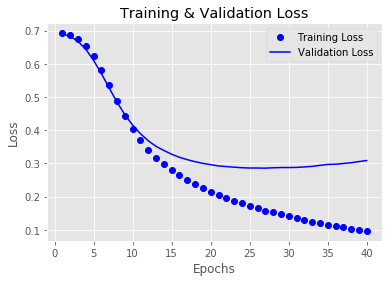

In [22]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss') # bo는 파란색 점.
plt.plot(epochs, val_loss, 'b', label='Validation Loss') # b는 파란 실선.
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

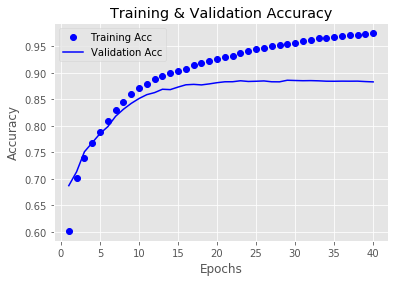

In [23]:
plt.plot(epochs, acc, 'bo', label='Training Acc') # bo는 파란색 점.
plt.plot(epochs, val_acc, 'b', label='Validation Acc') # b는 파란 실선.
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

     20번째 epoch에서 train-val의 그래프 간격이 커짐.
     이 즈음에서 Early Stopping하는 것이 좋아 보이네요.

- **train loss는 epoch마다 감소**하고, **train acc는 증가**하고 있음.
    - **경사하강법 최적화**를 사용할 때 볼 수 있는 현상.
    - 매번 반복마다 최적화 대상의 값을 최소화.
- 하지만 **val loss와 val acc는 그렇지 않음**. **20th epoch 이후로 어느정도 유지**되고 있음.
    - **최적화 지점**이라는 걸 얼핏 짐작할 수 있음.
    - **이전에 본 적 없는 데이터보다, 훈련 데이터에서 더 잘 작동하는 상황**. **Overfitting**.
    - 20th epoch부터 모델이 과도하게 최적화 되어 test set에서 일반화 되기 어려운 train set의 특정 표현을 학습.